In [ ]:
# PROJECT: CREDIT ASSESSMENT MODEL FOR BANKING AND FINANCIAL SECTOR #
# USING LOGISTIC REGRESSION #

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset from the data link
data_url = "https://github.com/YBIFoundation/Dataset/raw/main/Credit%20Default.csv"
df = pd.read_csv(data_url)

In [ ]:
#displaying first few rows from the dataset
print(df.head())

        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1


In [ ]:
#splitting the data into features and target variable
X = df.drop('Default', axis=1) #features
y = df['Default'] #target variable

In [ ]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#model selection and training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#predicting on training and testing data
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
#calculating the performance matrix
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

In [ ]:
#printing performance metrix
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.956875
Testing Accuracy: 0.9375
Confusion Matrix:
[[318  12]
 [ 13  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       330
           1       0.83      0.81      0.82        70

    accuracy                           0.94       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.94      0.94      0.94       400



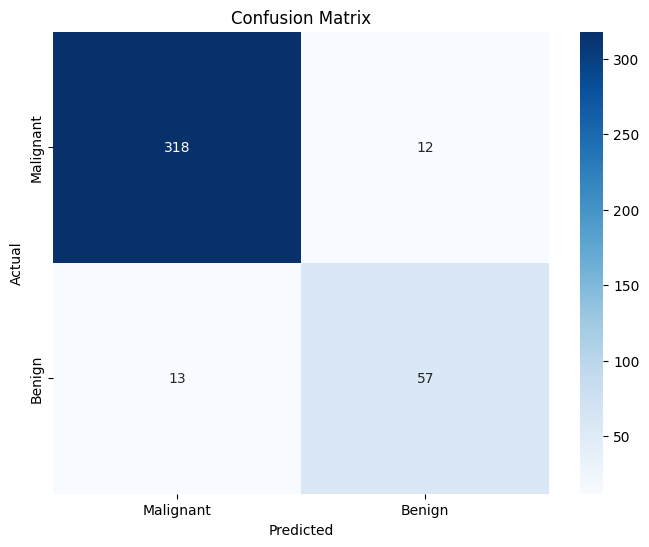

In [ ]:
#plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()